In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df = pd.read_csv('datasets/uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [110]:
df.shape

(200000, 9)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


# Pre-Processing

In [112]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [113]:
df.dropna(axis=0, inplace=True)

In [114]:
df.isnull().sum().sum()

0

In [115]:
# Dropping redundant columns
df.drop(columns=['Unnamed: 0','key'], axis=1, inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [117]:
# Converting object date to integer date

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']).astype(int) 
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,1431028326000000000,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,1247861096000000000,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,1251150300000000000,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,1246004541000000000,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,1409248020000000000,-73.925023,40.744085,-73.973082,40.761247,5


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  int64  
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 12.2 MB


# Handling Outliers

In [119]:
# Longitude ranges from 0 deg to 180 deg
# Latitude ranges from 0 deg to 90 deg

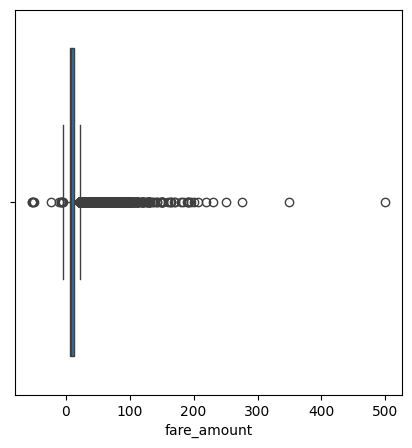

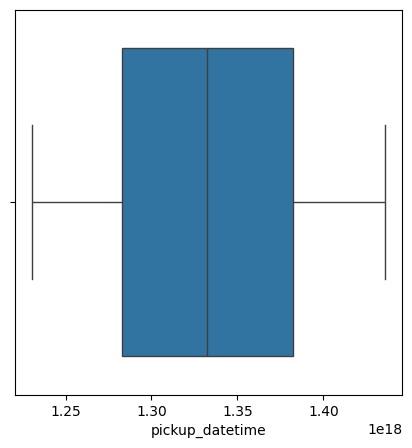

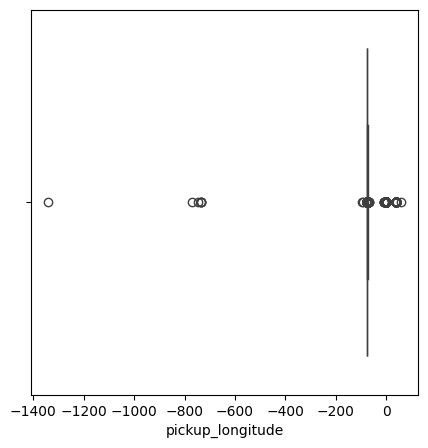

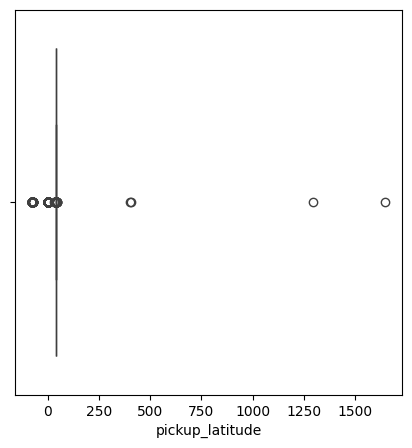

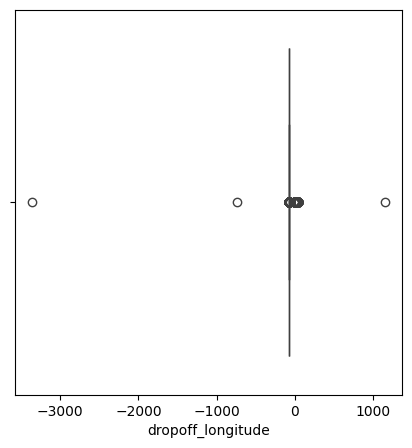

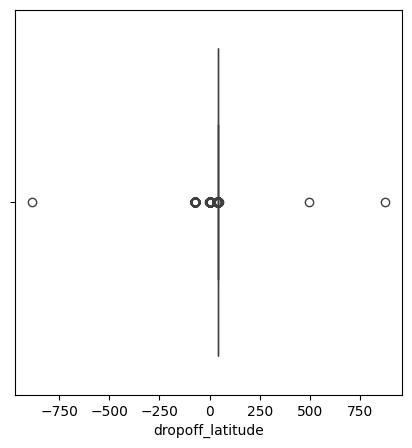

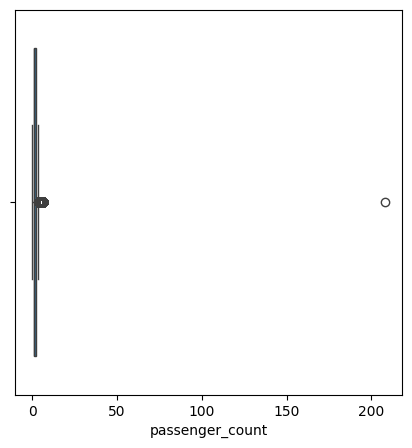

In [120]:
def plot_boxplot(col):
    plt.figure(figsize=(5,5))
    sns.boxplot(x=col)
    
for col in df.columns:
    plot_boxplot(df[col])

In [121]:
high = np.percentile(df['fare_amount'],99)
low = np.percentile(df['fare_amount'],1)

df = df[(df['fare_amount'] >= low) & (df['fare_amount'] <= high)]

# Correlation b/w columns

In [122]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,1431028326000000000,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,1247861096000000000,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,1251150300000000000,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,1246004541000000000,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,1409248020000000000,-73.925023,40.744085,-73.973082,40.761247,5


In [123]:
X = df.iloc[:,1:]
X

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,1431028326000000000,-73.999817,40.738354,-73.999512,40.723217,1
1,1247861096000000000,-73.994355,40.728225,-73.994710,40.750325,1
2,1251150300000000000,-74.005043,40.740770,-73.962565,40.772647,1
3,1246004541000000000,-73.976124,40.790844,-73.965316,40.803349,3
4,1409248020000000000,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199994,1391179320000000000,-73.983070,40.760770,-73.972972,40.754177,1
199996,1394759340000000000,-73.984722,40.736837,-74.006672,40.739620,1
199997,1246236120000000000,-73.986017,40.756487,-73.858957,40.692588,2
199998,1432133785000000000,-73.997124,40.725452,-73.983215,40.695415,1


In [124]:
y = df.iloc[:,0]
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199994    12.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 196316, dtype: float64

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [126]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(157052, 6)

(39264, 6)

(157052,)

(39264,)

In [127]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# X_train

<Axes: >

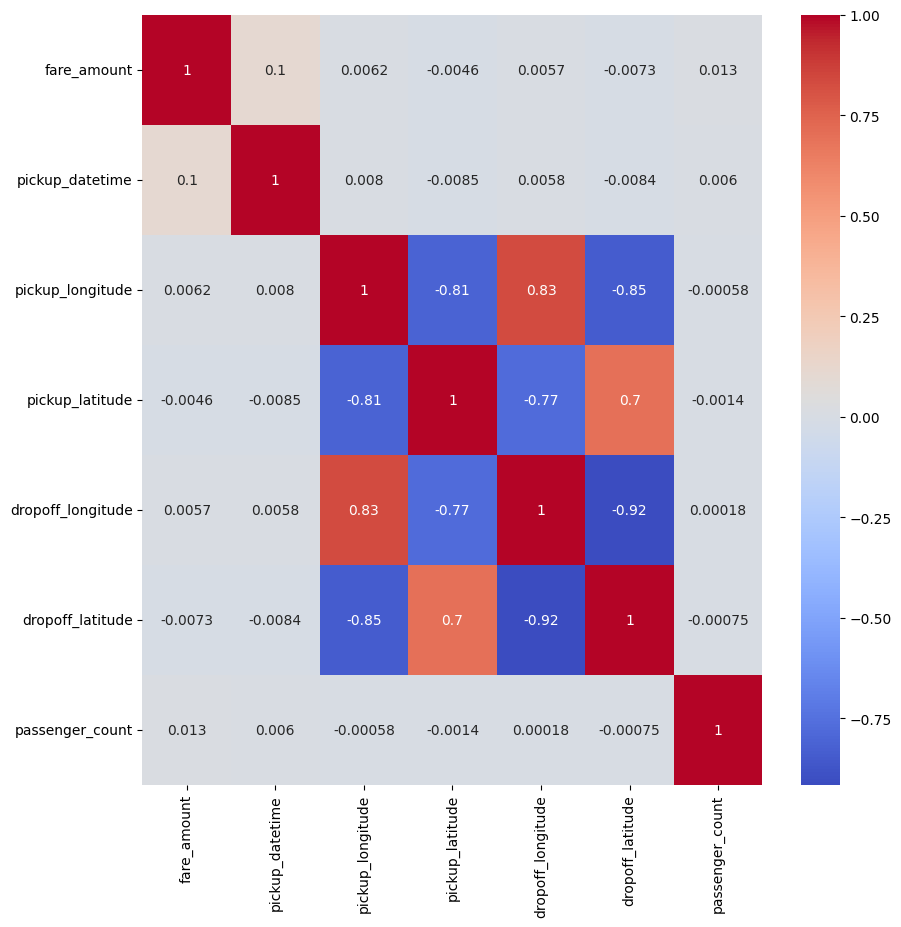

In [128]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [129]:
X.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,1431028326000000000,-73.999817,40.738354,-73.999512,40.723217,1
1,1247861096000000000,-73.994355,40.728225,-73.994710,40.750325,1
2,1251150300000000000,-74.005043,40.740770,-73.962565,40.772647,1
3,1246004541000000000,-73.976124,40.790844,-73.965316,40.803349,3
4,1409248020000000000,-73.925023,40.744085,-73.973082,40.761247,5


# Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [131]:
reg.fit(X_train, y_train)

LinearRegression()

In [132]:
y_pred = reg.predict(X_test)
y_pred

array([ 9.49241856, 10.76867594, 10.4907702 , ..., 12.17988422,
       10.42206422, 11.34285269])

In [133]:
y_test

61853      9.0
41662      5.7
156108     9.3
96206      6.9
21665      7.0
          ... 
181832    14.1
63884      5.5
81761      6.0
29180      5.7
19942      4.0
Name: fare_amount, Length: 39264, dtype: float64

In [135]:
from sklearn import metrics

print("R2 Score: ", metrics.r2_score(y_test,y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 Score:  0.009516264944188224
RMSE:  7.942137142753571


In [138]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157052 entries, 143967 to 90937
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    157052 non-null  int64  
 1   pickup_longitude   157052 non-null  float64
 2   pickup_latitude    157052 non-null  float64
 3   dropoff_longitude  157052 non-null  float64
 4   dropoff_latitude   157052 non-null  float64
 5   passenger_count    157052 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 8.4 MB


# Random Forest

In [151]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=15, random_state=2)


In [152]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=15, random_state=2)

In [153]:
y_pred = regressor.predict(X_test)

In [154]:
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  1.8930253327900026
Mean Squared Error:  12.05888342642398
RMSE:  3.4725903050063334
R2 Score:  0.8106437339910493
